In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, recall_score

In [148]:
data=pd.read_csv("C:/Users/dell/Documents/datasets/adult/adult.csv")

In [91]:
test=pd.read_csv("C:/Users/dell/Documents/datasets/adult/adult.test")

In [136]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [137]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [138]:
data['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

In [139]:
data['occupation']

0                        ?
1          Exec-managerial
2                        ?
3        Machine-op-inspct
4           Prof-specialty
               ...        
32556      Protective-serv
32557         Tech-support
32558    Machine-op-inspct
32559         Adm-clerical
32560         Adm-clerical
Name: occupation, Length: 32561, dtype: object

In [149]:
ind=data[data['workclass']=='?'].index
data.drop(ind, inplace=True)

inde=data[data['occupation']=='?'].index
data.drop(inde, inplace=True)

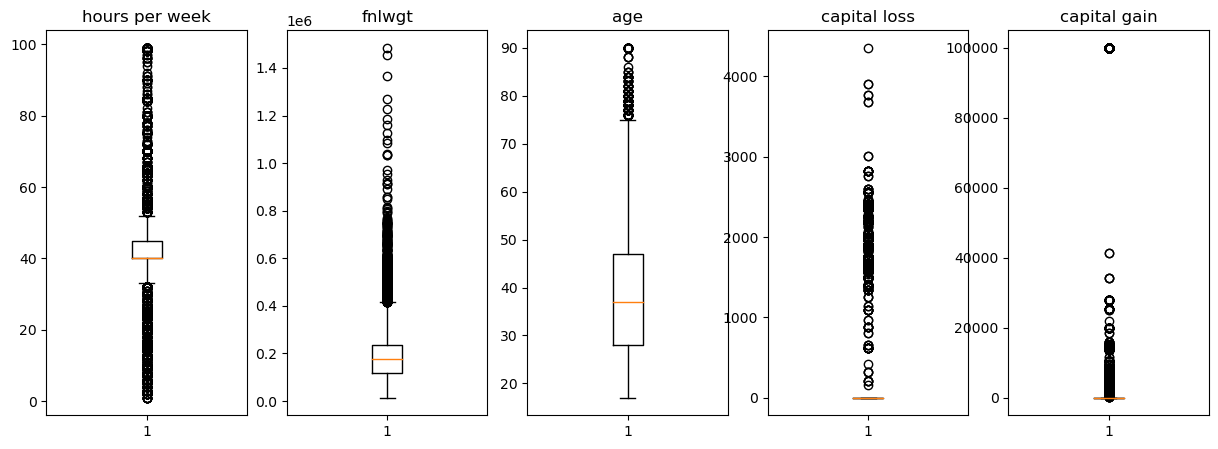

In [150]:
fig, ax=plt.subplots(1,5, figsize=(15,5))
ax[0].boxplot(data['hours.per.week'])
ax[0].set_title('hours per week')

ax[1].boxplot(data['fnlwgt'])
ax[1].set_title('fnlwgt')

ax[2].boxplot(data['age'])
ax[2].set_title('age')

ax[3].boxplot(data['capital.loss'])
ax[3].set_title('capital loss')

ax[4].boxplot(data['capital.gain'])
ax[4].set_title('capital gain')

plt.show()

In [151]:
hours=data[(data['hours.per.week'] > 58) & (data['hours.per.week'] < 35)].index
data.drop(hours, inplace=True)

In [152]:
age=data[data['age']>75].index
data.drop(age, inplace=True)

In [153]:
loss=data[data['capital.loss']>500].index
data.drop(loss, inplace=True)

In [154]:
gain=data[data['capital.gain']>5000].index
data.drop(gain, inplace=True)

In [155]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [156]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['workclass']=label.fit_transform(data['workclass'])
data['education']=label.fit_transform(data['education'])
data['marital.status']=label.fit_transform(data['marital.status'])
data['occupation']=label.fit_transform(data['occupation'])
data['relationship']=label.fit_transform(data['relationship'])
data['race']=label.fit_transform(data['race'])
data['sex']=label.fit_transform(data['sex'])
data['native.country']=label.fit_transform(data['native.country'])


In [157]:
data['income']=label.fit_transform(data['income'])

In [158]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1509,68,2,32779,11,9,2,13,0,4,1,0,419,12,38,0
1511,52,2,122109,11,9,4,9,4,4,0,0,323,40,38,0
1512,46,2,198774,12,14,0,3,4,4,0,0,323,45,38,0
1513,49,1,78859,12,14,6,9,4,4,0,0,323,20,38,0
1514,37,2,262409,12,14,0,3,4,4,0,0,213,45,38,0


In [159]:
correlation=data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

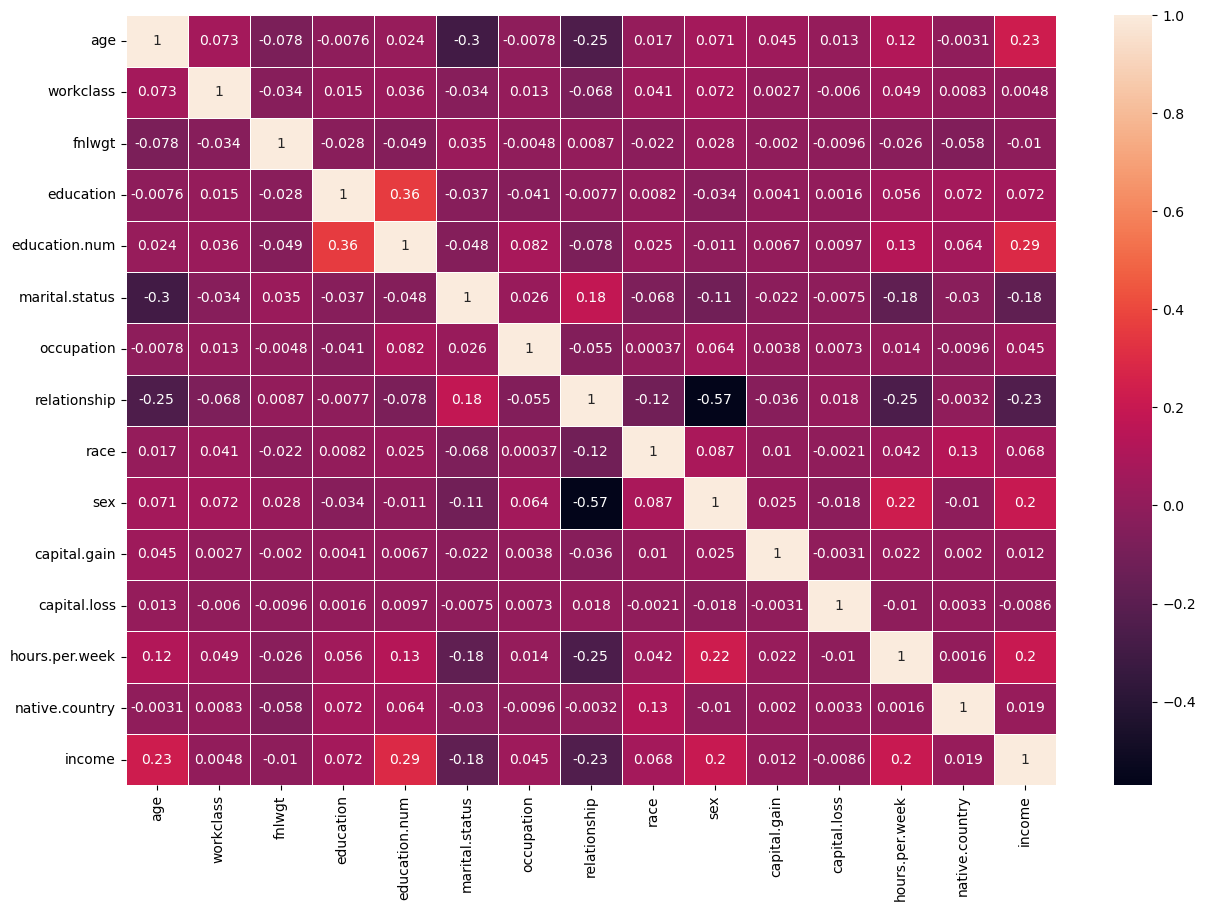

In [160]:
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(correlation, ax=ax, linewidth=.4, annot=True)
plt.show

In [161]:
x=data.drop(columns=['fnlwgt','marital.status','relationship','income','capital.loss'])
y=data['income']

In [162]:
x_train, x_test, y_train, y_test=train_test_split(x,y, shuffle=True, random_state=1234, test_size=0.25)
y_test.shape

(6879,)

In [163]:
ada=AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [164]:
yhat=ada.predict(x_test)

<h3> Performance Evaluation

In [165]:
precision=precision_score(yhat, y_test)
accuracy=accuracy_score(yhat,y_test)
recall=recall_score(yhat,y_test)
f1=f1_score(yhat,y_test)

<h3> Using Decision tree as a base estimator


In [168]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(criterion='gini', max_depth=8)
ad=AdaBoostClassifier(n_estimators=50, base_estimator=decision, learning_rate=1)
ad.fit(x_train, y_train)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                   learning_rate=1)

<h3> Performance Evaluation

In [169]:
yh=ad.predict(x_test)
accuracy= accuracy_score(yh, y_test)
print('accuracy of the algorithm is: ',accuracy)

precision=precision_score(yh, y_test)
print('precision score = ', precision)

f1=f1_score(yh, y_test)
print('f1 score = ', f1)

recall=recall_score(yh, y_test)
print('recall score = ', recall)

accuracy of the algorithm is:  0.8056403547027184
precision score =  0.41399851079672373
f1 score =  0.4540628828093099
recall score =  0.5027124773960217


<h3> Using Logistic Regression as a base estimator

In [170]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
add=AdaBoostClassifier(estimator=lr)
add.fit(x_train, y_train)
yhh=add.predict(x_test)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [171]:
accuracy= accuracy_score(yhh, y_test)
print('accuracy of the algorithm is: ',accuracy)

precision=precision_score(yhh, y_test)
print('precision score = ', precision)

f1=f1_score(yhh, y_test)
print('f1 score = ', f1)

recall=recall_score(yhh, y_test)
print('recall score = ', recall)

accuracy of the algorithm is:  0.8178514318941706
precision score =  0.24944154877140728
f1 score =  0.3484139365574623
recall score =  0.5775862068965517


<h3> Using Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rf=RandomForestClassifier()
adab=AdaBoostClassifier(estimator=rf, n_estimators=150)
adab.fit(x_train,y_train)
y_pred=adab.predict(x_test)

In [174]:
accuracy= accuracy_score(y_pred, y_test)
print('accuracy of the algorithm is: ',accuracy)

precision=precision_score(y_pred, y_test)
print('precision score = ', precision)

f1=f1_score(y_pred, y_test)
print('f1 score = ', f1)

recall=recall_score(y_pred, y_test)
print('recall score = ', recall)

accuracy of the algorithm is:  0.8105829335659253
precision score =  0.4043186895011169
f1 score =  0.4545835077438259
recall score =  0.5191204588910134
